# Visualization Scraped Springer Dates

In [2]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [3]:
# load
filename = "dates_df_1500_all_keyword_depression"
df = pd.read_csv(f"data/{filename}.csv")
df = df.rename(columns={"1": "Received", "2": "Accepted"})
print(df.shape[0])
df.head()

184


,Received,Accepted,journal,title
0,2021-07-16,2021-12-04,Current Psychology,New and interesting diatoms from the Shimen We...
1,2021-07-16,2021-12-04,Current Psychology,New and interesting diatoms from the Shimen We...
2,2021-09-27,2022-01-03,Current Psychology,BDNF Levels According to Variations in the CAC...
3,2021-09-27,2022-01-03,Current Psychology,BDNF Levels According to Variations in the CAC...
4,2021-11-21,2022-03-17,Current Psychology,Epidemiology and outcomes of pneumococcal seps...


In [4]:
df.groupby(["journal"])["journal"].count()

journal
Academic Psychiatry                                            8
Cognitive, Affective, & Behavioral Neuroscience                3
Current Psychology                                           117
Current Treatment Options in Psychiatry                        2
European Archives of Psychiatry and Clinical Neuroscience     23
International Journal of Mental Health and Addiction          30
Psychological Research                                         1
Name: journal, dtype: int64

In [5]:
df["Accepted"] = pd.DataFrame(df["Accepted"].astype("datetime64[us]"))
df["Received"] = pd.DataFrame(df["Received"].astype("datetime64[us]"))

In [6]:
print(len(df))
df = df.drop_duplicates(keep="first")
len(df)

184


156

## Days between dates

In [7]:
df["days_between"] = df["Accepted"] - df["Received"]
df

,Received,Accepted,journal,title,days_between
0,2021-07-16,2021-12-04,Current Psychology,New and interesting diatoms from the Shimen We...,141 days
2,2021-09-27,2022-01-03,Current Psychology,BDNF Levels According to Variations in the CAC...,98 days
4,2021-11-21,2022-03-17,Current Psychology,Epidemiology and outcomes of pneumococcal seps...,116 days
6,2022-10-21,2022-12-02,European Archives of Psychiatry and Clinical N...,Understanding youths’ concerns about climate c...,42 days
8,2022-10-18,2022-12-21,European Archives of Psychiatry and Clinical N...,Simultaneous 18F-FDG PET/MR metabolic and stru...,64 days
...,...,...,...,...,...
179,2021-06-22,2021-10-12,Current Psychology,Metabolic Syndrome and Body Composition Among ...,112 days
180,2021-03-05,2021-06-20,International Journal of Mental Health and Add...,Screening for Olfactory Dysfunction in COVID-1...,107 days
181,2021-01-13,2022-05-11,Current Psychology,Fatty acids in the inedible parts of jade perc...,483 days
182,2021-12-06,2022-05-12,Current Psychology,Medical avoidance among marginalized groups: t...,157 days


In [8]:
def split_between_1(row):
    return str(row).split(" ")[1]

def split_between_0(row):
    return str(row).split(" ")[0]

In [9]:
df["unit"] = df["days_between"].apply(split_between_1)
df["between"] = df["days_between"].apply(split_between_0)

In [10]:
df["between"] = df["between"].astype(int)

In [11]:
df.unit.unique()

array(['days'], dtype=object)

In [12]:
df = df.drop(["unit", "days_between"], axis=1)
df

,Received,Accepted,journal,title,between
0,2021-07-16,2021-12-04,Current Psychology,New and interesting diatoms from the Shimen We...,141
2,2021-09-27,2022-01-03,Current Psychology,BDNF Levels According to Variations in the CAC...,98
4,2021-11-21,2022-03-17,Current Psychology,Epidemiology and outcomes of pneumococcal seps...,116
6,2022-10-21,2022-12-02,European Archives of Psychiatry and Clinical N...,Understanding youths’ concerns about climate c...,42
8,2022-10-18,2022-12-21,European Archives of Psychiatry and Clinical N...,Simultaneous 18F-FDG PET/MR metabolic and stru...,64
...,...,...,...,...,...
179,2021-06-22,2021-10-12,Current Psychology,Metabolic Syndrome and Body Composition Among ...,112
180,2021-03-05,2021-06-20,International Journal of Mental Health and Add...,Screening for Olfactory Dysfunction in COVID-1...,107
181,2021-01-13,2022-05-11,Current Psychology,Fatty acids in the inedible parts of jade perc...,483
182,2021-12-06,2022-05-12,Current Psychology,Medical avoidance among marginalized groups: t...,157


In [13]:
pd.DataFrame(df.groupby(["journal", "between"])["between"].count()).tail(50)

between
journal                                            between         
Current Psychology                                 483            1
                                                   581            1
Current Treatment Options in Psychiatry            125            1
                                                   165            1
European Archives of Psychiatry and Clinical Ne... 15             1
                                                   42             1
                                                   46             1
                                                   56             1
                                                   62             1
                                                   64             1
                                                   80             1
                                                   87             1
                                                   92             1
                                                   101            1
                                                   106            1
                                                   107            1
                                                   113            1
                                                   115            1
                                                   147            1
                                                   155            1
                                                   178            2
                                                   231            1
                                                   269            1
                                                   907            1
International Journal of Mental Health and Addi... 31             2
                                                   69             1
                                                   73             1
                                                   74             1
                                                   77             1
                                                   80             1
                                                   85             1
                                                   88             1
                                                   97             2
                                                   101            1
                                                   107            1
                                                   128            1
                                                   136            1
                                                   142            1
                                                   165            1
                                                   167            1
                                                   170            2
                                                   188            1
                                                   194            1
                                                   203            1
                                                   218            1
                                                   271            1
                                                   315            1
                                                   364            1
                                                   410            1
Psychological Research                             92             1

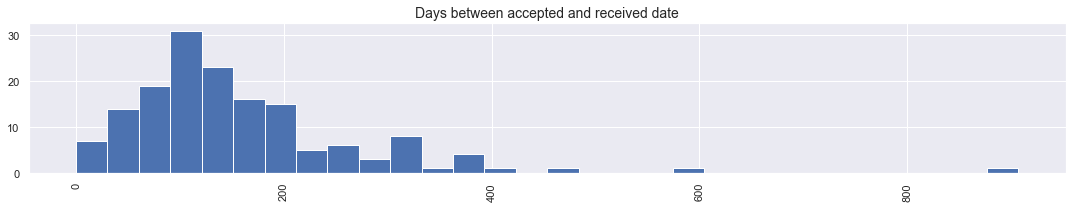

In [50]:
plt.figure(figsize=(15,3))
plt.hist(df.between.sort_values(), bins=30);
plt.xticks(rotation=90);
plt.title("Days between accepted and received date", fontsize=14);
plt.tight_layout()

In [54]:
fig = px.violin(df, y="between", box=True, points='all')
fig.show()

Text(0.5, 0, '')

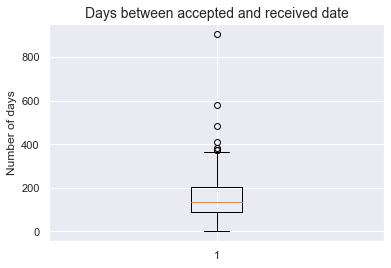

In [15]:
plt.boxplot(df.between);
plt.title("Days between accepted and received date", fontsize=14);
plt.ylabel("Number of days")
plt.xlabel("")

In [16]:
print(f"Minimum nr of days between accepted and received:\n{df.between.min()}")
print(f"\nMaximum nr of days between accepted and received:\n{df.between.max()}")
print(f"\nAverage nr of days between accepted and received:\n{np.round(df.between.mean(), 2)}")

Minimum nr of days between accepted and received:
0

Maximum nr of days between accepted and received:
907

Average nr of days between accepted and received:
156.94


In [17]:
df

,Received,Accepted,journal,title,between
0,2021-07-16,2021-12-04,Current Psychology,New and interesting diatoms from the Shimen We...,141
2,2021-09-27,2022-01-03,Current Psychology,BDNF Levels According to Variations in the CAC...,98
4,2021-11-21,2022-03-17,Current Psychology,Epidemiology and outcomes of pneumococcal seps...,116
6,2022-10-21,2022-12-02,European Archives of Psychiatry and Clinical N...,Understanding youths’ concerns about climate c...,42
8,2022-10-18,2022-12-21,European Archives of Psychiatry and Clinical N...,Simultaneous 18F-FDG PET/MR metabolic and stru...,64
...,...,...,...,...,...
179,2021-06-22,2021-10-12,Current Psychology,Metabolic Syndrome and Body Composition Among ...,112
180,2021-03-05,2021-06-20,International Journal of Mental Health and Add...,Screening for Olfactory Dysfunction in COVID-1...,107
181,2021-01-13,2022-05-11,Current Psychology,Fatty acids in the inedible parts of jade perc...,483
182,2021-12-06,2022-05-12,Current Psychology,Medical avoidance among marginalized groups: t...,157


In [18]:
df['date'] = list(df['Received'].dt.year.astype(str) + "-" + df['Received'].dt.month.astype(str))

In [19]:
df

,Received,Accepted,journal,title,between,date
0,2021-07-16,2021-12-04,Current Psychology,New and interesting diatoms from the Shimen We...,141,2021-7
2,2021-09-27,2022-01-03,Current Psychology,BDNF Levels According to Variations in the CAC...,98,2021-9
4,2021-11-21,2022-03-17,Current Psychology,Epidemiology and outcomes of pneumococcal seps...,116,2021-11
6,2022-10-21,2022-12-02,European Archives of Psychiatry and Clinical N...,Understanding youths’ concerns about climate c...,42,2022-10
8,2022-10-18,2022-12-21,European Archives of Psychiatry and Clinical N...,Simultaneous 18F-FDG PET/MR metabolic and stru...,64,2022-10
...,...,...,...,...,...,...
179,2021-06-22,2021-10-12,Current Psychology,Metabolic Syndrome and Body Composition Among ...,112,2021-6
180,2021-03-05,2021-06-20,International Journal of Mental Health and Add...,Screening for Olfactory Dysfunction in COVID-1...,107,2021-3
181,2021-01-13,2022-05-11,Current Psychology,Fatty acids in the inedible parts of jade perc...,483,2021-1
182,2021-12-06,2022-05-12,Current Psychology,Medical avoidance among marginalized groups: t...,157,2021-12


In [55]:
fig = px.strip(df, x="date", y="between")
fig.show()

## Split

In [21]:
df_accepted = pd.DataFrame(df["Accepted"])
# df_accepted["journal"] = df["journal"]
df_accepted.head()

,Accepted
0,2021-12-04
2,2022-01-03
4,2022-03-17
6,2022-12-02
8,2022-12-21


In [22]:
df_received = pd.DataFrame(df["Received"])
# df_received["journal"] = df["journal"]
df_received.head()

,Received
0,2021-07-16
2,2021-09-27
4,2021-11-21
6,2022-10-21
8,2022-10-18


#### Extract columns

In [23]:
# extract columns
df_accepted["year"] = df_accepted["Accepted"].dt.year
df_accepted["month"] = df_accepted["Accepted"].dt.month
df_accepted["day"] = df_accepted["Accepted"].dt.day
df_accepted.head()

,Accepted,year,month,day
0,2021-12-04,2021,12,4
2,2022-01-03,2022,1,3
4,2022-03-17,2022,3,17
6,2022-12-02,2022,12,2
8,2022-12-21,2022,12,21


#### Count per month

In [24]:
# total articles received per month per year
df_accepted_long = df_accepted.groupby(["year", "month"])["month"].count()

# turn multi index to columns
df_accepted_per_month = df_accepted_long.index.to_frame(name=['year', 'month'], index=False)
df_accepted_per_month["total"] = df_accepted_long.values
df_accepted_per_month = df_accepted_per_month.round(1)
df_accepted_per_month.head()

,year,month,total
0,2020,4,1
1,2021,6,1
2,2021,9,4
3,2021,10,2
4,2021,12,2


In [25]:
# total articles received per month per separate year
df_accepted_long = pd.DataFrame(df_accepted_long)
df_accepted_long

month
year month       
2020 4          1
2021 6          1
     9          4
     10         2
     12         2
2022 1          4
     2          1
     3          3
     4          6
     5         11
     6         12
     7          8
     8          3
     9         19
     10        34
     11        26
     12        19

In [26]:
df_accepted_long.index = df_accepted_long.index.set_names(['index1', 'index2'])

### Received

#### Extract columns

In [27]:
# extract columns
df_received["year"] = df_received["Received"].dt.year
df_received["month"] = df_received["Received"].dt.month
df_received["day"] = df_received["Received"].dt.day
print(df_received.shape[0])
df_received.head(15)

156


,Received,year,month,day
0,2021-07-16,2021,7,16
2,2021-09-27,2021,9,27
4,2021-11-21,2021,11,21
6,2022-10-21,2022,10,21
8,2022-10-18,2022,10,18
9,2022-06-28,2022,6,28
11,2022-03-02,2022,3,2
12,2022-07-27,2022,7,27
13,2022-08-14,2022,8,14
14,2022-08-14,2022,8,14


#### Count per month

In [28]:
# total articles received per month per year
df_received_long = df_received.groupby(["year", "month"])["month"].count()

# turn multi index to columns
df_received_per_month = df_received_long.index.to_frame(name=['year', 'month'], index=False)
df_received_per_month["total"] = df_received_long.values
df_received_per_month = df_received_per_month.round(1)
df_received_per_month.head(15)

,year,month,total
0,2020,2,1
1,2020,6,1
2,2020,11,1
3,2020,12,2
4,2021,1,1
5,2021,3,3
6,2021,4,2
7,2021,6,3
8,2021,7,1
9,2021,8,2


In [29]:
df_per_month = df_received_per_month.merge(df_accepted_per_month, "outer", on=["year", "month"],suffixes=["_received", "_accepted"])
df_per_month

,year,month,total_received,total_accepted
0,2020,2,1.0,NaN
1,2020,6,1.0,NaN
2,2020,11,1.0,NaN
3,2020,12,2.0,NaN
4,2021,1,1.0,NaN
5,2021,3,3.0,NaN
6,2021,4,2.0,NaN
7,2021,6,3.0,1.0
8,2021,7,1.0,NaN
9,2021,8,2.0,NaN


In [30]:
df_per_month["date"] = list(df_per_month.year.astype(str) + "-" + df_per_month.month.astype(str))

In [31]:
print(len(df_per_month))
print(df_per_month.total_received.sum())
print(df_per_month.total_accepted.sum())

27
156.0
156.0


In [32]:
df_per_month["datetime"] = df_per_month.date.astype("datetime64[m]")
df_per_month = df_per_month.sort_values(by="datetime")
df_per_month.reset_index(drop=True)

,year,month,total_received,total_accepted,date,datetime
0,2020,2,1.0,NaN,2020-2,2020-02-01
1,2020,4,NaN,1.0,2020-4,2020-04-01
2,2020,6,1.0,NaN,2020-6,2020-06-01
3,2020,11,1.0,NaN,2020-11,2020-11-01
4,2020,12,2.0,NaN,2020-12,2020-12-01
5,2021,1,1.0,NaN,2021-1,2021-01-01
6,2021,3,3.0,NaN,2021-3,2021-03-01
7,2021,4,2.0,NaN,2021-4,2021-04-01
8,2021,6,3.0,1.0,2021-6,2021-06-01
9,2021,7,1.0,NaN,2021-7,2021-07-01


## Plotting

### Total per month per year

In [33]:
# plotting received
fig = px.line(df_per_month, x="month", y="total_received", color="year", title="layout.hovermode='x unified'")
fig.update_traces(mode="markers+lines", hovertemplate=None)
fig.update_layout(hovermode="x unified", title="Total number of received articles per month")
fig.show()

In [34]:
# plotting accepted
fig = px.line(df_per_month, x="month", y="total_accepted", color="year", title="layout.hovermode='x unified'")
fig.update_traces(mode="markers+lines", hovertemplate=None)
fig.update_layout(hovermode="x unified", title="Total number of accepted articles per month")
fig.show()

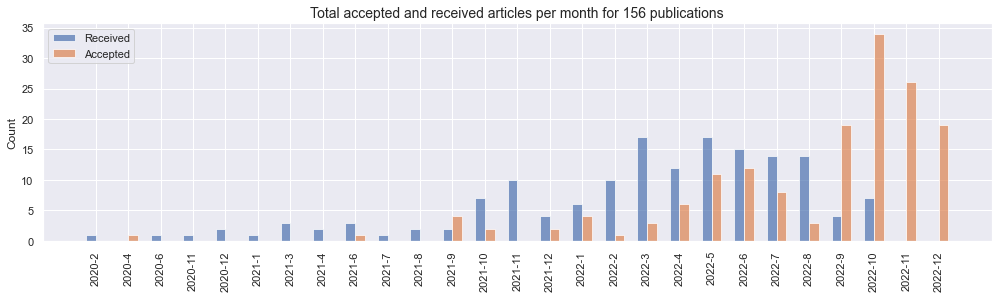

In [35]:
# parameters
width = 0.3
x_labels = df_per_month.date
x = np.arange(0, len(x_labels))

# plotting
plt.figure(figsize=(17,4))
ax = plt.subplot(111)
ax.bar(x, df_per_month.total_received, label="Received", alpha=0.7, width=width)
ax.bar(x + width, df_per_month.total_accepted, label="Accepted", alpha=0.7, width=width)

# styling
plt.title(f"Total accepted and received articles per month for {len(df)} publications", fontsize=14)
plt.xticks(x + width/2, x_labels, rotation=90);
plt.ylabel("Count")
plt.legend(loc="upper left")
plt.savefig(f"results/results_{filename}")

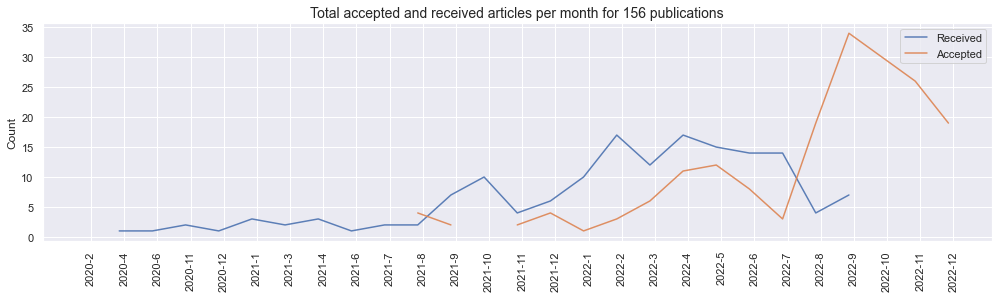

In [36]:
plt.figure(figsize=(17,4))
df_per_month.total_received.plot(label="Received", alpha=0.9)
df_per_month.total_accepted.plot(label="Accepted", alpha=0.9)

# styling
plt.title(f"Total accepted and received articles per month for {len(df)} publications", fontsize=14)
plt.xticks(x + width/2, x_labels, rotation=90);
plt.ylabel("Count")
plt.legend()

Text(0, 0.5, 'Count')

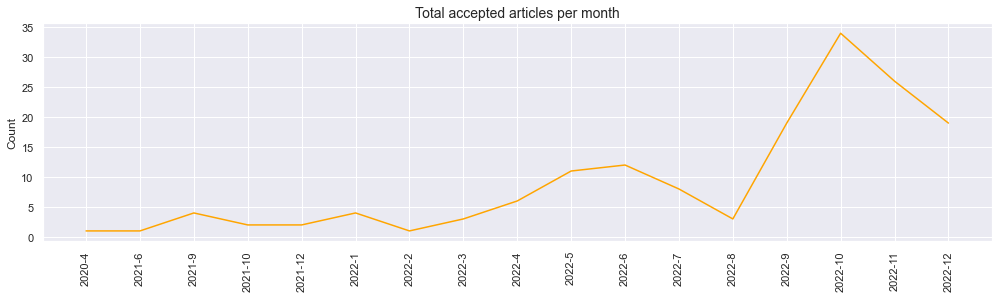

In [37]:
plt.figure(figsize=(17,4))
df_accepted_per_month.total.plot(color="orange")
plt.title("Total accepted articles per month", fontsize=14)
x_labels = list(df_accepted_per_month.year.astype(str) + "-" + df_accepted_per_month.month.astype(str))
plt.xticks(np.arange(0, len(x_labels)), x_labels, rotation=90);
plt.ylabel("Count")

Text(0.5, 1.0, 'Total received and accepted articles per month for multiple years')

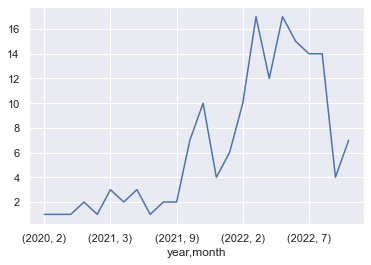

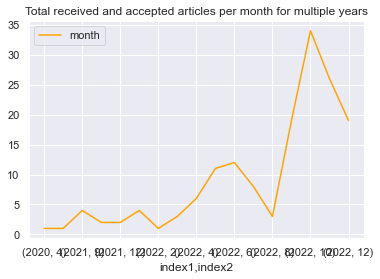

In [38]:
df_received_long.plot()
df_accepted_long.plot(color="orange")
plt.title("Total received and accepted articles per month for multiple years")

### Total per month

Text(0, 0.5, 'Count')

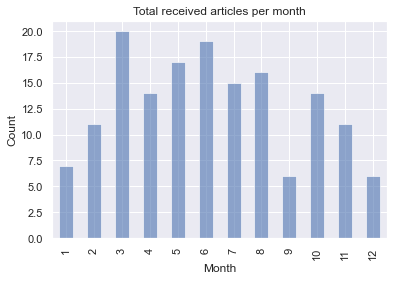

In [39]:
# plotting received
df_received.groupby(df_received.month)["month"].count().plot(kind="bar", alpha=0.6, legend=False)
plt.title("Total received articles per month")
plt.xlabel("Month")
plt.ylabel("Count")
# smooth_plot(df_received.groupby(df_received["Received"].dt.month).count(), "lightblue", "Received")

In [40]:
# plotting accepted
df_accepted.groupby(df_accepted.month)["month"].count()

month
1      4
2      1
3      3
4      7
5     11
6     13
7      8
8      3
9     23
10    36
11    26
12    21
Name: month, dtype: int64

Text(0, 0.5, 'Count')

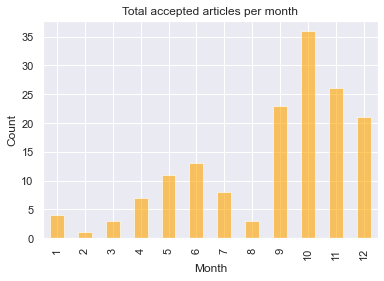

In [41]:
# plotting accepted
df_accepted.groupby(df_accepted.month)["month"].count().plot(kind="bar", alpha=0.6, color="orange", legend=False)
plt.title("Total accepted articles per month")
plt.xlabel("Month")
plt.ylabel("Count")
# smooth_plot(df_accepted.groupby(df_accepted["Accepted"].dt.month).count(), "orange", "Accepted")

### Comparison

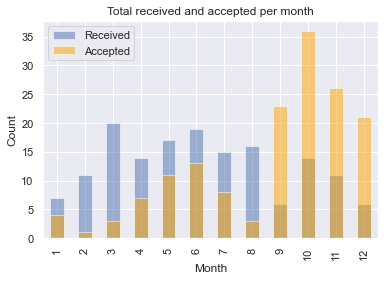

In [42]:
# compare both
ax = df_received.groupby(df_received.month)["month"].count().plot(kind="bar", alpha=0.5, label="Received")
df_accepted.groupby(df_accepted.month)["month"].count().plot(kind="bar", color="orange", alpha=0.5, label="Accepted", ax=ax)
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.title("Total received and accepted per month");

In [43]:
df_received = df_received[df_received.year == 2022]
df_accepted = df_accepted[df_accepted.year == 2022]

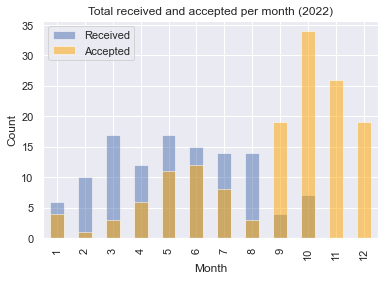

In [44]:
# compare both
ax = df_received.groupby(df_received.month)["month"].count().plot(kind="bar", alpha=0.5, label="Received")
df_accepted.groupby(df_accepted.month)["month"].count().plot(kind="bar", color="orange", alpha=0.5, label="Accepted", ax=ax)
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.title("Total received and accepted per month (2022)");

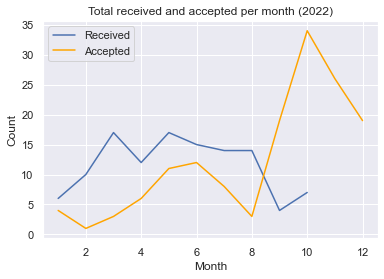

In [45]:
ax = df_received.groupby(df_received.month)["month"].count().plot(kind="line", label="Received")
df_accepted.groupby(df_accepted.month)["month"].count().plot(kind="line", color="orange", label="Accepted", ax=ax)
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.title("Total received and accepted per month (2022)");

### Smooth curve

In [46]:
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

def smooth_plot(data, color, label):
    
    # create data
    x = np.arange(0, 12, 1)
    x_ticks = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    y = np.array(data)

    # define x as 200 equally spaced values between the min and max of original x 
    xnew = np.linspace(x.min(), x.max(), 200) 

    # define spline with degree k=7
    spl = make_interp_spline(x, y, k=7)
    y_smooth = spl(xnew)

    # create smooth line chart 
    plt.plot(xnew, y_smooth, color=color, label=label)

In [47]:
smooth_plot(df_received.groupby(df_received["Received"].dt.month).count(), "lightblue", "Received")
smooth_plot(df_accepted.groupby(df_accepted["Accepted"].dt.month).count(), "orange", "Accepted")
plt.legend()

ValueError: Shapes of x (12,) and y (10, 4) are incompatible

Note:
- Not always received date
- No accepted data for 2019-2020
- Received date: first received, then reviewed and corrections made? If so, date isn't representative because if article needs lot of changes, it will take longer to be accepted (or, difference between accepted & received in same month is not a valid measure, since articles often have to be sent back a few times?)